In [1]:
from gradcam.utils import visualize_cam
from gradcam import GradCAM, GradCAMpp
from torchvision.utils import make_grid, save_image
from torchvision import  transforms, models
from torch import nn
from XrayDataset import XrayDataset
from torch.utils.data import DataLoader
from torchvision.utils import make_grid, save_image
import torch
import matplotlib.pyplot as plt
import numpy as np




Bad key "text.kerning_factor" on line 4 in
/home/ramkik/anaconda3/envs/pytorch/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
classes = ['normal', 'COVID-19', 'other_pneumonia']

In [3]:
checkpoint = 'checkpoint1'

In [4]:
model = models.resnet50(pretrained=True)

In [5]:
model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 3))

In [6]:
transform = transforms.Compose([
#                                      transforms.Resize((350,350)),
#                                     transforms.CenterCrop(280),
#      transforms.RandomRotation(15),
#                                         transforms.ColorJitter(brightness=0.3, contrast=0.3),
#                                         transforms.RandomVerticalFlip(p=0.4),
    
#                                         transforms.RandomHorizontalFlip(p=0.4),
#                                       transforms.Resize((224,224)),
#                                       transforms.ToTensor()
                                     
    transforms.RandomRotation(30),
                                    transforms.RandomResizedCrop(224),
                                    transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
#                                       transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                      ])

normalize =  transforms.Normalize(mean=[0.5], std=[0.5])
   

combined = transforms.Compose([transform, normalize])


In [7]:
train_dataset = XrayDataset( 'data', 'train', 'train.csv', transform )

test_dataset = XrayDataset('data', 'test', 'test.csv', transform )

In [8]:
batch_size = 50

In [9]:
train_dataloader = DataLoader(train_dataset, batch_size=batch_size,  shuffle=True, num_workers=4)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False, num_workers=4)

In [10]:
#image, label = next(iter(train_dataloader))

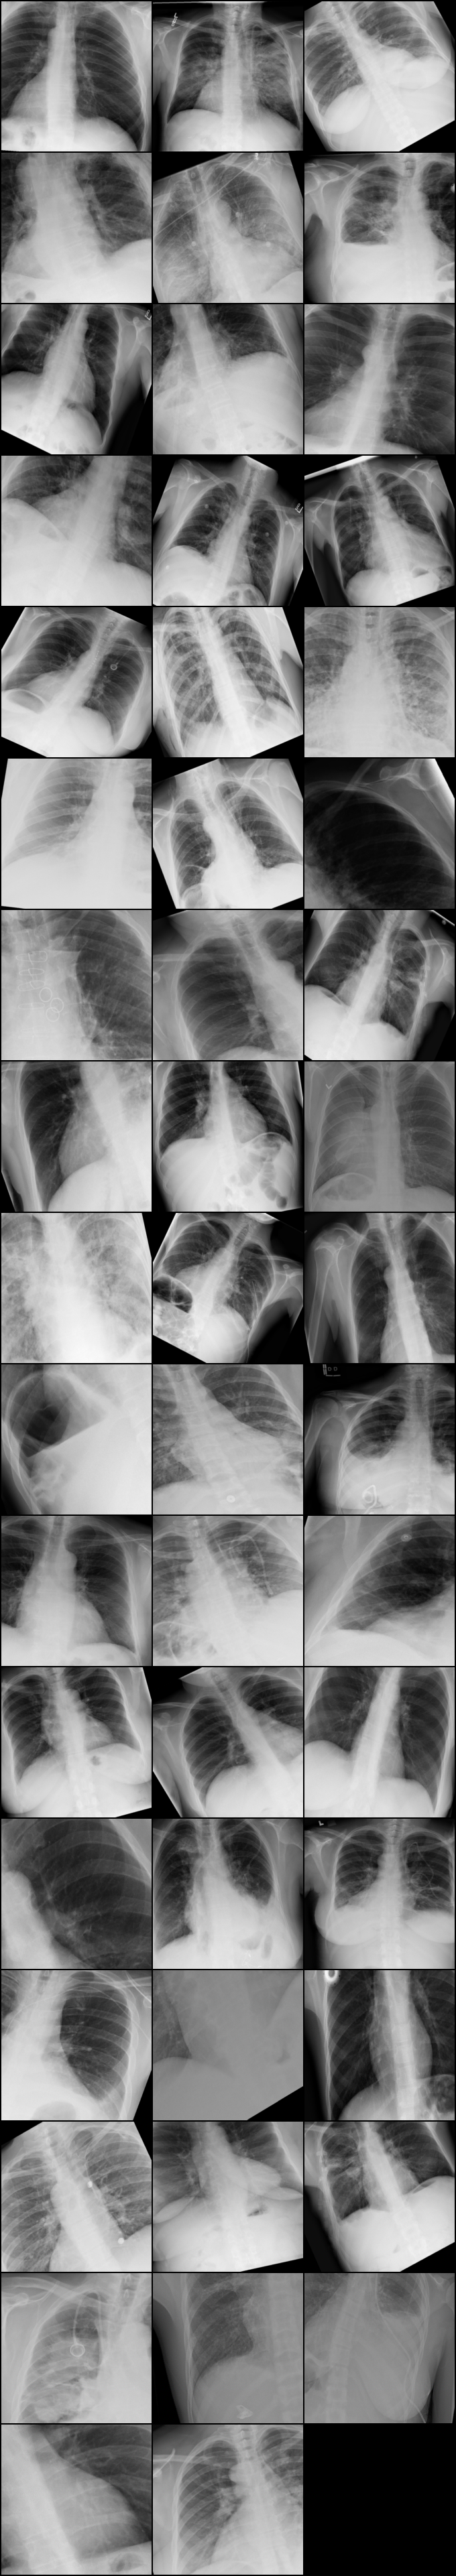

In [11]:

image, label = next(iter(train_dataloader))
grid_image = make_grid(image, nrow=3)
#axes[count].imshow(grid_image.permute(1, 2, 0

transforms.ToPILImage()(grid_image)